# Introduction

### About music and datasets

Can we imagine our life without music? Of course not :) <br> Each of us find motivation, calmness or even a cure for mental problems in it.

In [ ]:
from IPython import display
from IPython.display import Image
display.Image("https://besthqwallpapers.com/Uploads/27-6-2018/57312/thumb2-music-art-creative-doodles-abstract-art-notes.jpg")

There are so many artists nowadays who compete with the rest for the title of the best, besides, the most popular music <br> platforms like Spotify or AppleMusic create tops in various genres in terms of the number of listeners, followers and streams. <br> Many people are interested in not only following the development of their favorite artists, but also often looking for new ones, <br> mostly the most popular ones, although, popularity is usually not a sign of quality. For example, somebody says: "Oh, this singer too famous, why haven't I heard from him until now?" So... <br> Let's analize following datasets with a huge number of different features. <br> Let's learn all about new artists, their songs and popularity!

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

# Uploading data

Data has been collected from Spotify and Genius API's:

In [ ]:
display.Image('https://www.computerra.ru/wp-content/uploads/2020/03/voyz-spotify-logo.jpg', width = 350, height = 150) 

__[Link to Spotify](https://www.spotify.com)__

In [ ]:
display.Image('https://upload.wikimedia.org/wikipedia/commons/5/51/Genius-logo.png', width = 350, height = 150) 

__[Link to Genius](https://genius.com)__

### Artists dataset

In [ ]:
artists_df = pd.read_csv('../input/spotgen-music-dataset/SpotGenTrack/Data Sources/spotify_artists.csv')
artists_df = artists_df.drop(['Unnamed: 0'], axis=1)
artists_df = artists_df.rename(columns = {'id':'artists_id'})
artists_df.head(2)

In [ ]:
artists_df = artists_df.drop(['track_name_prev', 'type'], axis=1)

In [ ]:
artists_df.info()

In [ ]:
artists_df.head(2)

This dataset contains 2 number values: artist_popularity and followers, some objects, name, id, id link to tracks dataset.

### Albums dataset

In [ ]:
albums_df = pd.read_csv('../input/spotgen-music-dataset/SpotGenTrack/Data Sources/spotify_albums.csv')
albums_df = albums_df.drop(['Unnamed: 0'], axis=1)
albums_df = albums_df.rename(columns = {'id':'album_id'})
albums_df.head(2)

In [ ]:
albums_df = albums_df.drop(['available_markets', 'external_urls', 'href', 'images', 'uri', 'type'], axis=1)

In [ ]:
albums_df.head(2)

This dataset contains albums names, release dates, number of tracks, and all id links to other datasets, and some unuseful features.

### Tracks dataset

In [ ]:
tracks_df = pd.read_csv('../input/spotgen-music-dataset/SpotGenTrack/Data Sources/spotify_tracks.csv')
tracks_df = tracks_df.drop(['Unnamed: 0'], axis=1)
tracks_df = tracks_df.rename(columns = {'id':'track_id', 'popularity': 'track_popularity'})
tracks_df.head(2)

Change id column so that it will be similar with id in other datasets.

In [ ]:
tracks_df.artists_id = tracks_df.artists_id.str.strip("[]")
tracks_df.artists_id = tracks_df.artists_id.str.strip("'")

In [ ]:
tracks_df.country.unique()

In [ ]:
def country_func(x):
    if x == 'BE': return 1
    elif x == 'AR': return 2
    else: return 3
    
tracks_df.country = tracks_df.country.apply(country_func)

Let's look at values of some columns. We need to normalize (standardize) a column 'duration_ms', the values of what spread of this feature is too large. For example, we can use MinMaxScaler to normalize it: <br>
from sklearn.preprocessing import MinMaxScaler <br>
tracks_df['duration_ms'] = MinMaxScaler().fit_transform(np.array(tracks_df['duration_ms']).reshape(-1,1))

Although, use another way, standardize by subtracting the mean and dividing by the standard deviation:

In [ ]:
tracks_df['duration_ms'] = (tracks_df['duration_ms'] - tracks_df['duration_ms'].mean()) / tracks_df['duration_ms'].std()    

In [ ]:
tracks_df = tracks_df.drop(['album_id', 'analysis_url', 'disc_number', 'available_markets', 'href', 'mode', 'lyrics', 'playlist', 'name', 'preview_url', 'track_href', 'track_name_prev', 'uri', 'type'], axis=1)

In [ ]:
tracks_df.info()

In [ ]:
tracks_df.head()

This dataset contains the most important features and all id links to other datasets.

### Audio features dataset

In [ ]:
audio_features_df = pd.read_csv('../input/spotgen-music-dataset/SpotGenTrack/Features Extracted/lyrics_features.csv')
audio_features_df = audio_features_df.drop(['Unnamed: 0'], axis=1)
audio_features_df.head(2)

In [ ]:
audio_features_df.info()

This dataset contains 207 features and 1 object, id link to tracks dataset.

### Lyrics dataset

In [ ]:
lyrics_df = pd.read_csv('../input/spotgen-music-dataset/SpotGenTrack/Features Extracted/lyrics_features.csv')
lyrics_df = lyrics_df.drop(['Unnamed: 0'], axis=1)
lyrics_df.head(2)

Just lyrics dataset, that contains some features that we will hardly use, since the artist's popularity is influenced by the theme, the meanings of the lyrics, and not by the number of words or syllables)

# Visualization

In this part we'll build graphs and analyze the relation of features directly in datasets without mixing them.

In [ ]:
display.Image('https://i.pinimg.com/originals/bb/09/71/bb09712949419a346cb085da42dbe638.jpg') 

### Country

In [ ]:
labels = ['BE', 'FI', 'AR']
values = tracks_df.country.value_counts()/tracks_df.country.shape[0]
colors = sns.color_palette('RdPu_r')[0:3]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%', normalize=False )
plt.show()

It is impossible to say exactly which specific countries the creator of this dataset meant among the designations 'BE', 'FI', 'AR' <br> I think this information you can gain in Kaggle discussions:)

### Followers - popularity

In [ ]:
artists_df.loc[artists_df.followers == artists_df.followers.max()]

So, the highest number of followers has Ed Sheeran, more than 40 000 000.

In [ ]:
artists_df.loc[artists_df.artist_popularity == artists_df.artist_popularity.max()]

The highest popularity score has Ariana Grande, 100 points!

In [ ]:
# 0 < number of followers < 4.1 e7
ax = plt.axes()
plt.scatter(artists_df.followers, artists_df.artist_popularity, c="y", marker=r'$\clubsuit$')
y = np.linspace(0, 100)
x = np.linspace(0, 40000000)
plt.plot(y**10/(10**12)+2*10**6, y, linestyle='solid', c="g")
plt.xlabel("Number of followers")
plt.ylabel("Artist Popularity")
plt.show()

We can see, that up to 5 million followers: most of the artists are in this range, their popularity is above the parabola branch in relation to the number of followers, which means the undoubted dependence of these features; more than 5 million followers: artists popularity is approximately 80 points and higher.

### Release date - albums count

In [ ]:
albums_df["release_date"] = pd.to_datetime(albums_df["release_date"])

In [ ]:
albums_df["release_date"].min(), albums_df["release_date"].max()

These are the first and the last date of albums releases from our data.

In [ ]:
albums_df['release_date'] = pd.DatetimeIndex(albums_df['release_date']).year

In [ ]:
years = albums_df.release_date.unique()
years

In [ ]:
L = []
for year in years:
    L.append((albums_df.loc[albums_df.release_date == year]).count())
albums_counter = []
for i in range(len(L)):
    albums_counter.append(L[i][0])

In [ ]:
data_dataframe = pd.DataFrame({'year': years, 'count': albums_counter })
data_dataframe.sort_values(by='year', ascending=False, na_position='first', inplace=True)
data_dataframe.head(2)

In [ ]:
g = sns.catplot(data=data_dataframe, kind="bar", x="year", y="count", palette="spring_r")
g.fig.set_size_inches(15,5)
g.despine(left=True)
g.set(xticklabels=[])

In graph we can see that many new albums have appeared since our century, more precisely, most of them have already been added to the Spotify platform. Of course, a significant increase in the number of new albums and artists is explained by the development of the music industry generally.

### Key of the song - popularity

In [ ]:
key_dataframe = pd.DataFrame({'key': tracks_df.key, 'track_popularity_mean': tracks_df.track_popularity})
key_dataframe.groupby(['key'], as_index=True)\
    .aggregate({'track_popularity_mean': 'mean'})

In [ ]:
m = sns.catplot(data=key_dataframe, kind="bar", x="key", y="track_popularity_mean", palette="spring_r")
m.fig.set_size_inches(8,4)

The choice of the key of the song does not affect its popularity. In any case, let's determine which song key takes first place in our ranking: <br>
Use this site__[Key and Bpm of song](https://songbpm.com/)__ and check what is Key 8 in our dataset

In [ ]:
((tracks_df.loc[tracks_df.key == 8]).loc[tracks_df.track_popularity == 80]).iloc[0:1]

Track id: 5z3vuYzS9UF6rD6TmBEdUf, Artist id: 4A7HeXSd4HtQuf6IR5XZ1b <br>
Search in Kaggle Data Explorer: this song is FERO47 - JAJA

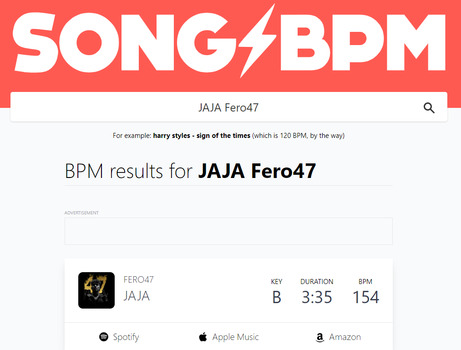

Key 8 = Key B (B major) <br> Interestingly, this is not the most popular key, such as C major :)

### Tempo - popularity

In [ ]:
tempo_1_dataframe = pd.DataFrame({'tempo': tracks_df.loc[tracks_df.track_popularity > 85].tempo, 'track_popularity': tracks_df.loc[tracks_df.track_popularity > 85].track_popularity})
tempo_2_dataframe = pd.DataFrame({'tempo': tracks_df.loc[tracks_df.track_popularity < 11].tempo, 'track_popularity': tracks_df.loc[tracks_df.track_popularity < 11].track_popularity})
pd.merge(tempo_1_dataframe.groupby(['track_popularity'], as_index=False).aggregate({'tempo': 'mean'}), tempo_2_dataframe.groupby(['track_popularity'], as_index=False).aggregate({'tempo': 'mean'}), left_index=True, right_index=True)

So... Hits, i.e. songs with high popularity, have a high tempo in average.

# "Merge and conquer"

In [ ]:
tracks_df.shape, artists_df.shape

Let's add to the tracks dataset artists popularity, because it can be nice feature in case of target dependence.

In [ ]:
extended_tracks_df = pd.merge(tracks_df, artists_df[['artists_id', 'artist_popularity']], on='artists_id')
extended_tracks_df.shape

In [ ]:
extended_tracks_df = pd.merge(tracks_df, artists_df[['artists_id', 'artist_popularity']], on='artists_id')
extended_tracks_df.head()

Let's use the correlation matrix, the best helper in sorting and selecting features for our future model.

In [ ]:
corr=extended_tracks_df.corr().round(2)

sns.set(font_scale=0.85)
plt.figure(figsize=(10, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='cool',mask=mask,cbar=True)
plt.title('Correlation matrix')

What we can see? 'Energy' feature correlate with 'loudness', so we need to drop one of them. We have already done a similar procedure with audio features dataset. <br>
'artist_popularity' feature correlate with 'track_popularity', but the last is our target, output, so that it's really important for our model. Like I'd sayd, we'd been added nice feature in track dataset.

In [ ]:
extended_tracks_df = extended_tracks_df.drop(['energy'], axis=1)

In [ ]:
extended_tracks_df.track_popularity.max()

In [ ]:
extended_tracks_df.head(2)

We will most likely use this dataset to build a model and do some predictions. <br>
Futhermore, make another dataset using pandas.merge(), it'll be tracks + artists popularity + audio features

In [ ]:
merged_tracks_df = pd.merge(extended_tracks_df, audio_features_df, on='track_id')

In [ ]:
merged_tracks_df.info()

In [ ]:
merged_tracks_df.head(2)

We have 2 links: track_id and artists_id, target: track_popularity, others: features

In [ ]:
merged_tracks_df.shape

Now, let's work with extended and merged datasets. <br>
We can check more precise relation between artist and track popularity.

In [ ]:
ax = plt.axes()
plt.scatter(extended_tracks_df.artist_popularity, extended_tracks_df.track_popularity, c="m", marker=r'$\clubsuit$')
x = np.linspace(0, 100)
plt.plot(x, x + 18, linestyle='solid', c="r")
plt.xlabel("Artist Popularity")
plt.ylabel("Track Popularity")
plt.show()

I've cross one line that show how these features depends on each other. So what we have? <br>
At first, only famous and popular artists can make their songs very popular. Secondly, artists popularity may not affect the popularity of their songs generally, so that they can write a bad song that will get a low rating.

# Modeling

### Test - train split

(We continue to use our merged dataset)

In [ ]:
tracks_df_test = merged_tracks_df.sample(n=10000, random_state=1)
tracks_df_train = merged_tracks_df.drop(tracks_df_test.index)

In [ ]:
X_train = tracks_df_train.drop(columns = ['artists_id', 'track_id', 'track_popularity'])
y_train = tracks_df_train.track_popularity

In [ ]:
X_test = tracks_df_test.drop(columns = ['artists_id', 'track_id', 'track_popularity'])
y_test = tracks_df_test.track_popularity

### sklearn linear regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
first_predictions = model.predict(X_test)

In [ ]:
first_predictions

In [ ]:
y_test

In [ ]:
eps = first_predictions - y_test
eps

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f"
    % mean_squared_error(y_test, first_predictions))

In [ ]:
counter = 0
for i in eps:
    if abs(i) > 20: counter+=1
counter      

The result is approximately 1/20 of test sample and 95% of accuracy, so our predictions are correct in case of allowable error < 20 popularity points. Althouth, it's not successful enough)

# To be continued...